In [1]:
import os
if not os.path.isdir('database'):
    os.chdir("..")

In [2]:
import pandas as pd

from utils import technical

In [3]:
currency_pair = "xrpeur"
df = pd.read_pickle(f"database/{currency_pair}.pkl")

### Moving average

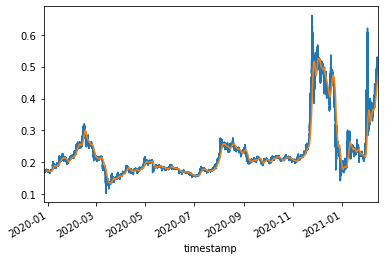

In [9]:
df.close.plot()
df.close.rolling(5000).mean().plot()

### MACD example
With getgains=True returns the percentage gains

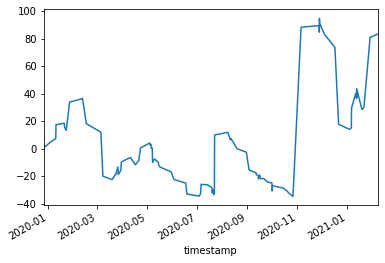

In [12]:
technical.macd(df.close, 10000, 1000, getgains=True, commissions=0.005).cumsum().plot()